# Group 4 Presentation Workspace

## Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import requests
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import seaborn as sns
from scipy.stats import chi2_contingency
import requests
import io

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''
# We will use the method below to import external files

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# importing Sample_Dataset_2014.csv

# Get the file ID from Google Drive share link
file_id = "1VcluNkVfGUdZbW5-66yYy2iqXXM0myww"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Use pandas to read the CSV content
Sample_Dataset_2014 = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))

# Display the dataframe
Sample_Dataset_2014.head()

ids        bday enrolldate expgradate Rank                    Major  \
0  43783   3/22/1995                                                       
1  20278    1/1/1995                                          Philosophy   
2  20389  12/31/1994                                                       
3  22820   12/1/1994                             business administration   
4  24559  11/10/1994                                                       

  Gender  Athlete Height  Weight  ... English Reading   Math Writing  \
0      0        0  72.35          ...   88.24    81.5  60.02   81.44   
1      0        0  70.66   179.2  ...   89.45   85.25  70.19   73.27   
2      0        0  70.68  198.52  ...   96.73   86.88   71.2   84.24   
3      1        0         198.34  ...   74.06   88.68  55.89   73.16   
4      1        1  67.43  128.17  ...   82.61    77.3  65.52   80.45   

          State LiveOnCampus HowCommute CommuteTime SleepTime StudyTime  
0      In state            1                                7         1  
1                          1                                5         2  
2      In state                                             8         7  
3      In state            1                                2         6  
4  Out of state            1                                7         3  

[5 rows x 23 columns]

In [ ]:
# importing turkey_political_opinions.csv

# Get the file ID from Google Drive share link
file_id = "1B1T7HDVa_p7juQQbxYnsElM0RmMMtdfs"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Use pandas to read the CSV content
turkey_political_opinions = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))

# Display the dataframe
turkey_political_opinions.head()

Timestamp Cinsiyet    Yas    Bolge     Egitim  soru1 soru2  soru3  \
0  5/11/2018 1:26:14    Erkek  18-30  Marmara     Lisans  Hayır  Evet   Evet   
1  5/11/2018 1:28:11    Erkek  18-30  Marmara     Lisans   Evet  Evet  Hayır   
2  5/11/2018 1:28:26    Kadın  18-30  Marmara     Lisans  Hayır  Evet  Hayır   
3  5/11/2018 1:30:18    Erkek   0-18  Marmara       Lise   Evet  Evet  Hayır   
4  5/11/2018 1:30:21    Erkek  18-30  Marmara  Ön Lisans  Hayır  Evet   Evet   

   soru4  soru5  soru6  soru7  soru8  soru9 soru10      parti  
0  Hayır  Hayır  Hayır   Evet  Hayır   Evet   Evet  IYI PARTI  
1   Evet  Hayır   Evet  Hayır   Evet  Hayır  Hayır        AKP  
2  Hayır  Hayır  Hayır   Evet  Hayır   Evet   Evet      DIĞER  
3   Evet  Hayır   Evet   Evet   Evet   Evet   Evet  IYI PARTI  
4   Evet  Hayır  Hayır   Evet   Evet  Hayır  Hayır  IYI PARTI

In [ ]:
# importing customer_dbase_sel.csv

# Get the file ID from Google Drive share link
file_id = "1f1rFMK1FcB89dRgcf4TLgxeI8bgplxjC"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Use pandas to read the CSV content
customer_dbase_sel = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))

# Display the dataframe
customer_dbase_sel.head()

custid  gender  age age_cat  debtinc        card  carditems  \
0  3964-QJWTRG-NPN  Female   20   18-24     11.1  Mastercard          5   
1  0648-AIPJSP-UVM    Male   22   18-24     18.6        Visa          5   
2  5195-TLUDJE-HVO  Female   67     >65      9.9        Visa          9   
3  4459-VLPQUH-3OL    Male   23   18-24      5.7        Visa         17   
4  8158-SMTQFB-CNO    Male   26   25-34      1.7    Discover          8   

   cardspent cardtype  creddebt  ... carown  region              ed_cat  \
0      81.66     None      1.20  ...    Own  Zone 1        Some college   
1      42.60    Other      1.22  ...    Own  Zone 5      College degree   
2     184.22     None      0.93  ...    Own  Zone 3  High school degree   
3     340.99     None      0.02  ...    Own  Zone 4        Some college   
4     255.10     Gold      0.21  ...  Lease  Zone 2        Some college   

   ed_years                      job_cat employ_years       emp_cat retire  \
0        15  Managerial and Professional            0   Less than 2     No   
1        17             Sales and Office            0   Less than 2     No   
2        14             Sales and Office           16  More than 15     No   
3        16             Sales and Office            0   Less than 2     No   
4        16             Sales and Office            1   Less than 2     No   

  annual_income    inc_cat  
0       31000.0  $25 - $49  
1       15000.0  Under $25  
2       35000.0  $25 - $49  
3       20000.0  Under $25  
4       23000.0  Under $25  

[5 rows x 30 columns]

In [ ]:
def contingency_table_to_percentage(contingency_table, axis=1):
    """
    Convert a contingency table to percentage presentation.

    Parameters:
    - contingency_table: A Pandas DataFrame representing the contingency table.
    - axis: Axis along which to normalize (0 for rows, 1 for columns).

    Returns:
    - A contingency table with values as percentages.
    """
    if axis == 0:
        # Normalize along rows (percentage within each row)
        percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    elif axis == 1:
        # Normalize along columns (percentage within each column)
        percentage_table = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    else:
        raise ValueError("Axis must be 0 or 1.")

    return percentage_table

In [ ]:
def plot_contingency_table(contingency_table, message='They'):
    """
    Plot a bar chart to visualize a contingency table.

    Parameters:
    - contingency_table: A Pandas DataFrame representing the contingency table.
    """
    # Convert a contingency table to percentage presentation
    contingency_table = contingency_table_to_percentage(contingency_table)

    # Transpose the contingency table for better visualization
    contingency_table = contingency_table.transpose()

    # Plot the bar chart
    ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and legend
    plt.xlabel('Categories')
    plt.ylabel('Percentage Counts')
    plt.title('Contingency Table Visualization')
    plt.legend(title='Groups', loc='upper right', bbox_to_anchor=(1.2, 1))

    # Show the plot
    plt.show()

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("Chi-squared value:", chi2)
    print("p value:", p)
    if p < 0.05:
      print('The observed data is unlikely to have occurred by random chance alone: ', message, 'are not independent\n')
    else:
      print(message, 'are independent\n')

In [ ]:
# This is the function to print out each of the 2-d contingency table between every df[key] in batch, as well as the Chi-squared test
def contingency_2d_in_batch(df, key):
  key_len = len(key)
  for i in range (key_len):
    for j in range (1, key_len - i):
      contingency = pd.crosstab(df[key[i]], df[key[i+j]])
      print('The 2-dimensional contingency table between', key[i], 'and', key[i+j], 'is:\n', contingency, '\n')
      plot_contingency_table(contingency, str(key[i])+' and '+str(key[i+j]))

In [ ]:
# This is the function to print out the n-d contingency table of every df[key], as well as the Chi-squared test
def contingency_all_dimension(df, key):
  key_len = len(key)
  contingency = pd.crosstab(df[key[0]], [df[column_name] for column_name in key[1:]])
  print('The', key_len, '-dimensional contingency table between', key, 'is:')
  display(contingency.head())
  plot_contingency_table(contingency, key)

In [ ]:
def print_plain_dataframe(df):
    styled_df = df.style  # Get the styled DataFrame object
    styled_str = styled_df.to_string()  # Convert it to a styled string
    print(styled_str)

## P1

###Test null hypotheses of: men and women do not differ in their political preferences

In [ ]:
#dataset:https://www. kaggle. com/datasets/yemregundogmus/turkey—political-—opinions/
# df_original = pd.read_csv('turkey_political_opinions.csv')
# df_original.head() #Cinsiyet=gender parti=political preference
gender_political_df = turkey_political_opinions[['Cinsiyet','parti']]
gender_political_df = gender_political_df.rename(columns={'Cinsiyet':'Gender', 'parti':'Party'})
gender_political_df['Gender']=gender_political_df['Gender'].replace('Erkek','Male').replace('Kadin', 'Female')
gender_political_df.head()

Gender      Party
0   Male  IYI PARTI
1   Male        AKP
2  Kadın      DIĞER
3   Male  IYI PARTI
4   Male  IYI PARTI

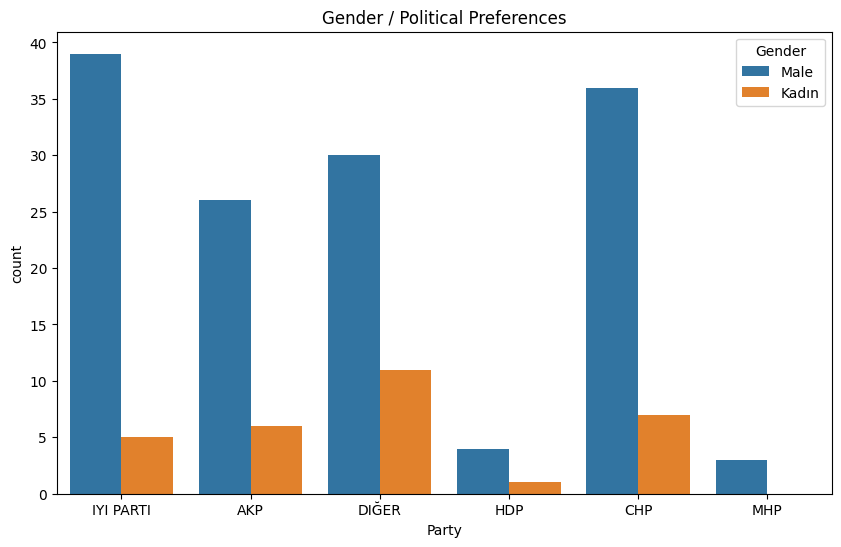

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=gender_political_df, x='Party', hue='Gender')

plt.title('Gender / Political Preferences')
plt.show()

In [ ]:
contingency = pd.crosstab(gender_political_df['Gender'], gender_political_df['Party'])
_, p, _, _ = chi2_contingency(contingency)
p

0.5108034697119613

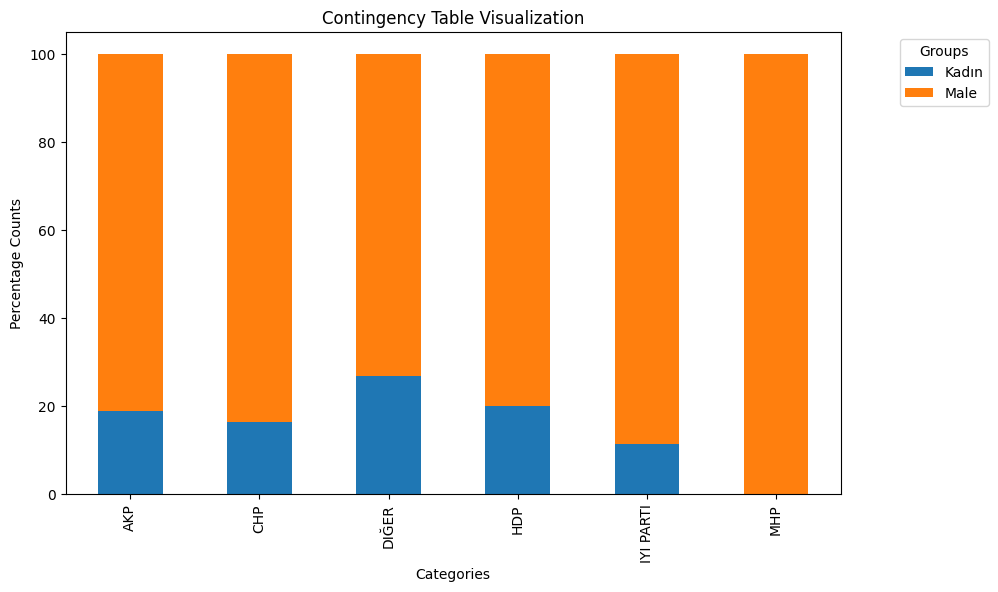

Chi-squared value: 31.785615845556755
p value: 6.551154703528323e-06
The observed data is unlikely to have occurred by random chance alone:  They are not independent



In [ ]:
contingency = pd.crosstab(gender_political_df['Gender'], gender_political_df['Party'])
plot_contingency_table(contingency)

### Test null hypotheses of: iOS and Android users do not differ by age group (younger or older than 32 years)

In [ ]:
# This is the dataset from lecture 3
lec3_phone = {
    '18-22': [93, 75, 168],
    '23-31': [200, 154, 354],
    '32-45': [219, 149, 368],
    '46-55': [93, 47, 140],
    '56-66': [53, 28, 81],
    '67+': [7, 14, 21],
}
lec3_phone = pd.DataFrame(lec3_phone, index=['Android', 'ios', 'Total'])
lec3_phone.head()

18-22  23-31  32-45  46-55  56-66  67+
Android     93    200    219     93     53    7
ios         75    154    149     47     28   14
Total      168    354    368    140     81   21

In [ ]:
# legacy / feel free to remove
'''
# Transpose the dataframe for easier plotting
lec3_phone_T = lec3_phone.transpose()

# Calculate the ratios
lec3_phone_T['Android_ratio'] = lec3_phone_T['Android'] / 665 # total
lec3_phone_T['ios_ratio'] = lec3_phone_T['ios'] / 467 # total

# Plot the ratios
lec3_phone_T[['Android_ratio', 'ios_ratio']].plot(kind='bar', figsize=(12,7))
plt.title('Comparison of Android vs. iOS users across age groups')
plt.ylabel('Ratio of users across age groups')
plt.xlabel('Age Groups')
plt.show()
'''

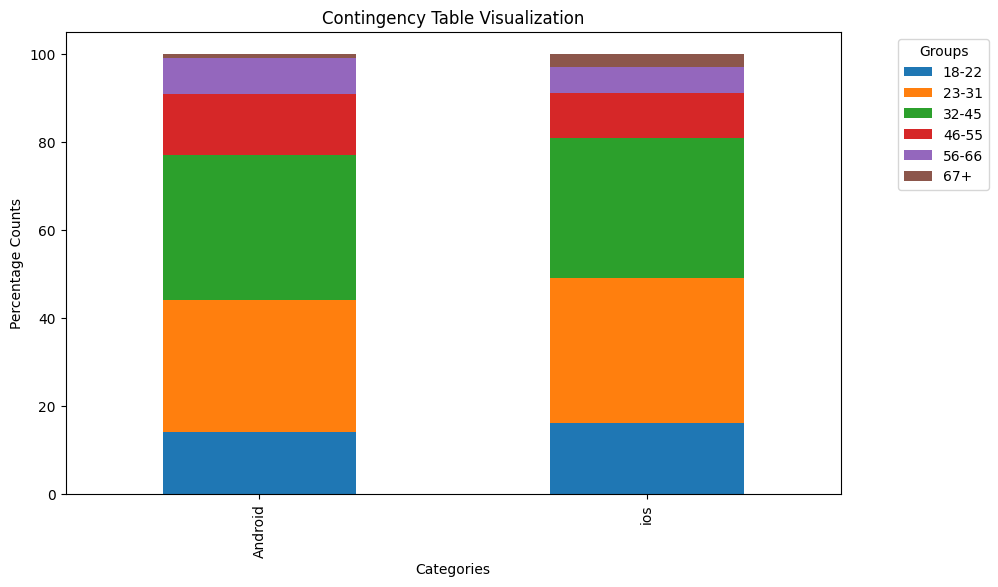

Chi-squared value: 2.1455118395775163
p value: 0.8286663754384014
iOS and Android users across age groups are independent



In [ ]:
# Chi-Squared Test
# Exclude the "Total" row for the chi-squared test

contingency = lec3_phone.iloc[0:2, :].transpose()
plot_contingency_table(contingency, 'iOS and Android users across age groups')

## P2
Explain how you can perform hypothesis testing for categorical data to compare two distributions, e.g., sample and population distributions, or distributions for two groups. In your
IPython notebook, for comparing distributions of two groups use iOS vs. Android user data
for 6 age groups, for comparing sample and population distributions find your own dataset
(e.g., election voting). Provide your code and plots in the IPython notebook.

## P3
Perform a test of association for N-dimensional tables, e.g., in your IPython notebook test a hypothesis that sex, immigration status, and political party affiliation are independent of each other. Provide your code and plots in the IPython notebook

### Test null hypotheses of:

### Test null hypotheses of: Gender, CardType, Card Level, and Retirement Status are independent of each other

The 2-dimensional contingency table between gender and card is:
 card    American Express  Discover  Mastercard  Other  Visa
gender                                                     
Female               412       675         636    132   696
Male                 588       658         566     83   554 



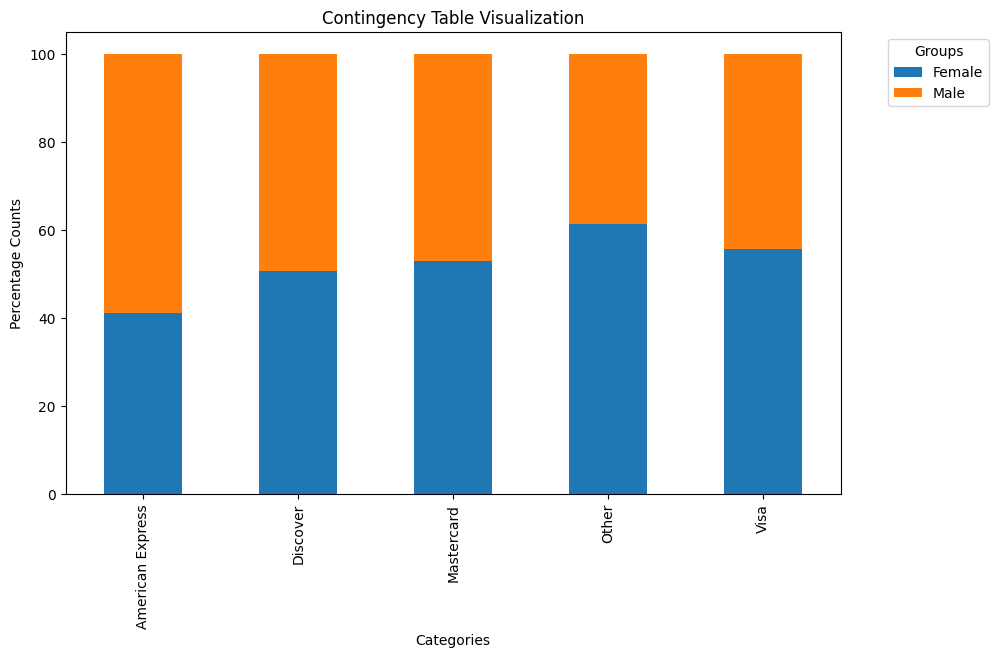

Chi-squared value: 8.838828858677607
p value: 0.06525669330904722
gender and card are independent

The 2-dimensional contingency table between gender and cardtype is:
 cardtype  Gold  None  Other  Platinum
gender                               
Female     630   661    634       626
Male       618   573    629       629 



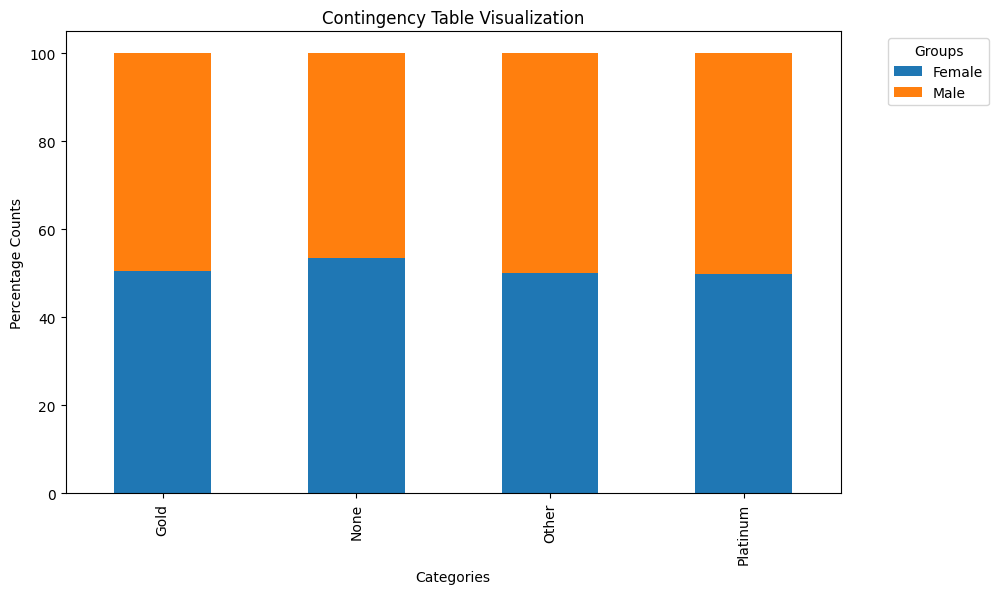

Chi-squared value: 0.3499425270996628
p value: 0.9503775039688331
gender and cardtype are independent

The 2-dimensional contingency table between gender and retire is:
 retire    No  Yes
gender           
Female  2184  367
Male    2084  365 



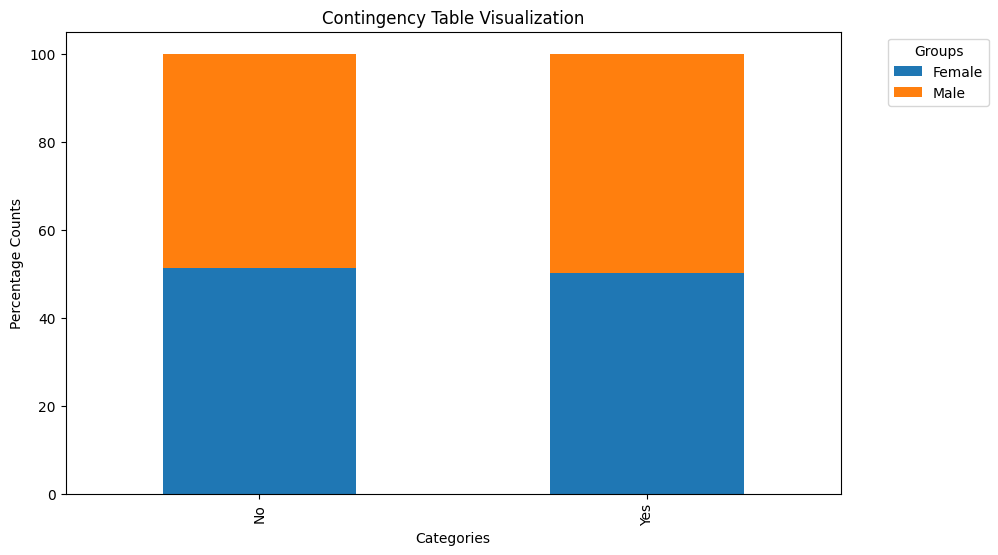

Chi-squared value: 2.4360015359667454e-05
p value: 0.9960619876195889
gender and retire are independent

The 2-dimensional contingency table between card and cardtype is:
 cardtype          Gold  None  Other  Platinum
card                                         
American Express   237   257    248       258
Discover           346   322    337       328
Mastercard         313   279    301       309
Other               49    56     62        48
Visa               303   320    315       312 



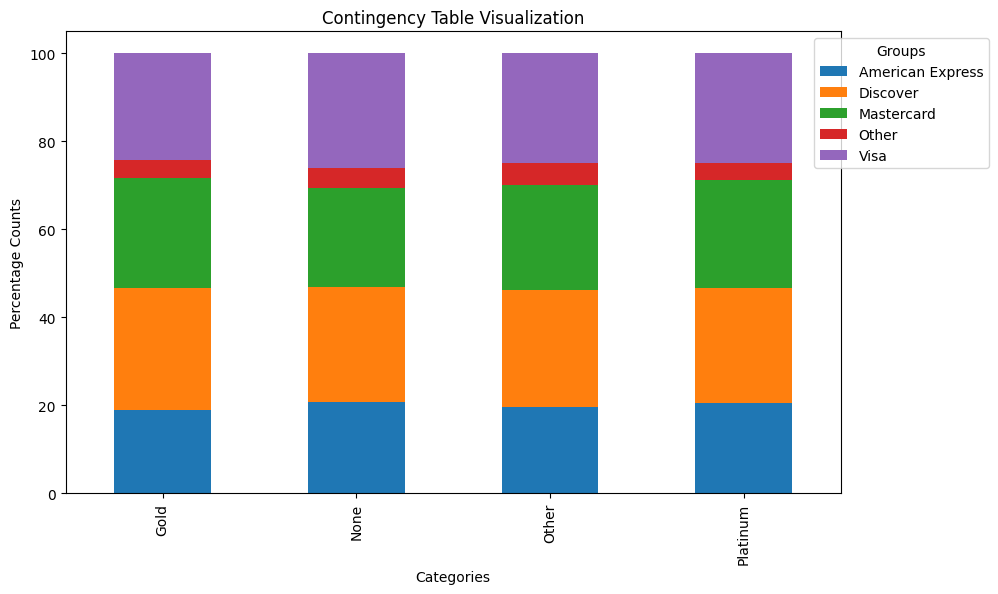

Chi-squared value: 0.559083814256803
p value: 0.9999994781418085
card and cardtype are independent

The 2-dimensional contingency table between card and retire is:
 retire              No  Yes
card                       
American Express   868  132
Discover          1177  156
Mastercard        1005  197
Other              176   39
Visa              1042  208 



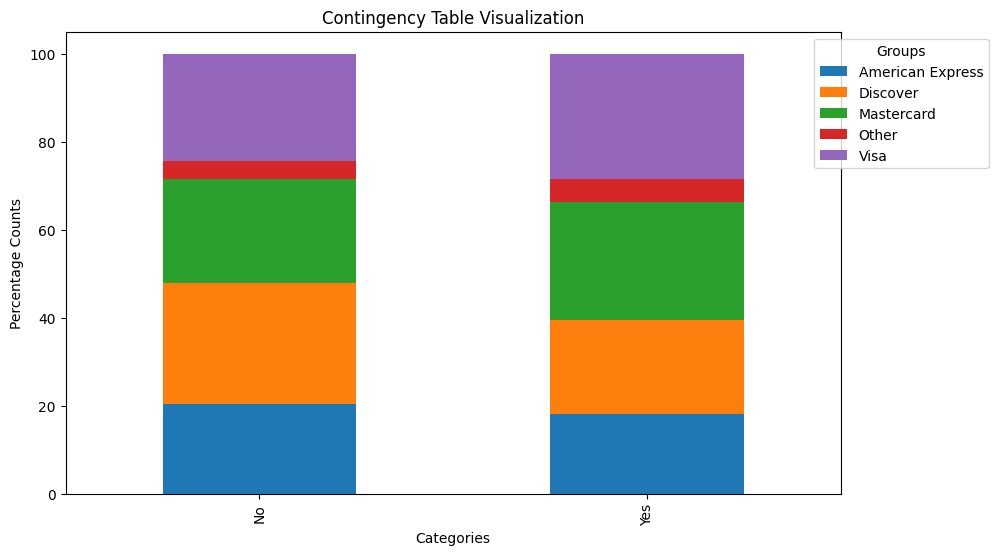

Chi-squared value: 1.6223498563087047
p value: 0.8047696738903551
card and retire are independent

The 2-dimensional contingency table between cardtype and retire is:
 retire      No  Yes
cardtype           
Gold      1071  177
None      1040  194
Other     1094  169
Platinum  1063  192 



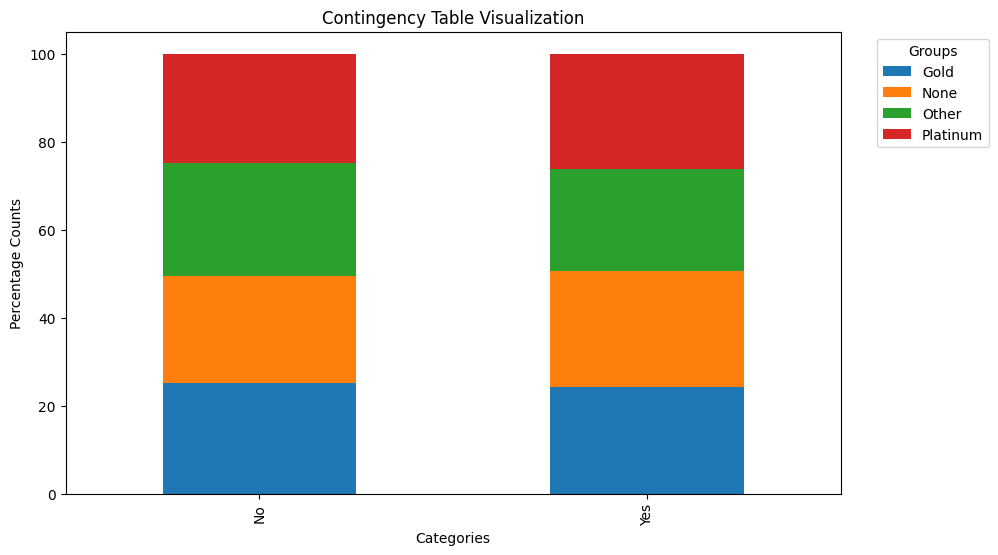

Chi-squared value: 0.27376960752839175
p value: 0.9648837790311677
cardtype and retire are independent



In [ ]:
# 2-dimensional contingency table
customer_dbase_sel_key_list = ['gender', 'card', 'cardtype', 'retire']
contingency_2d_in_batch(customer_dbase_sel, customer_dbase_sel_key_list)

The 4 -dimensional contingency table between ['gender', 'card', 'cardtype', 'retire'] is:


card     American Express                                     Discover      \
cardtype             Gold     None     Other     Platinum         Gold       
retire                 No Yes   No Yes    No Yes       No Yes       No Yes   
gender                                                                       
Female                 89   9   83  17    81  17      104  12      152  26   
Male                  120  19  137  20   123  27      131  11      142  26   

card      ...    Other     Visa                                      
cardtype  ... Platinum     Gold     None     Other     Platinum      
retire    ...       No Yes   No Yes   No Yes    No Yes       No Yes  
gender    ...                                                        
Female    ...       23   9  141  21  163  27   145  24      136  39  
Male      ...       13   3  115  26  106  24   128  18      108  29  

[2 rows x 40 columns]

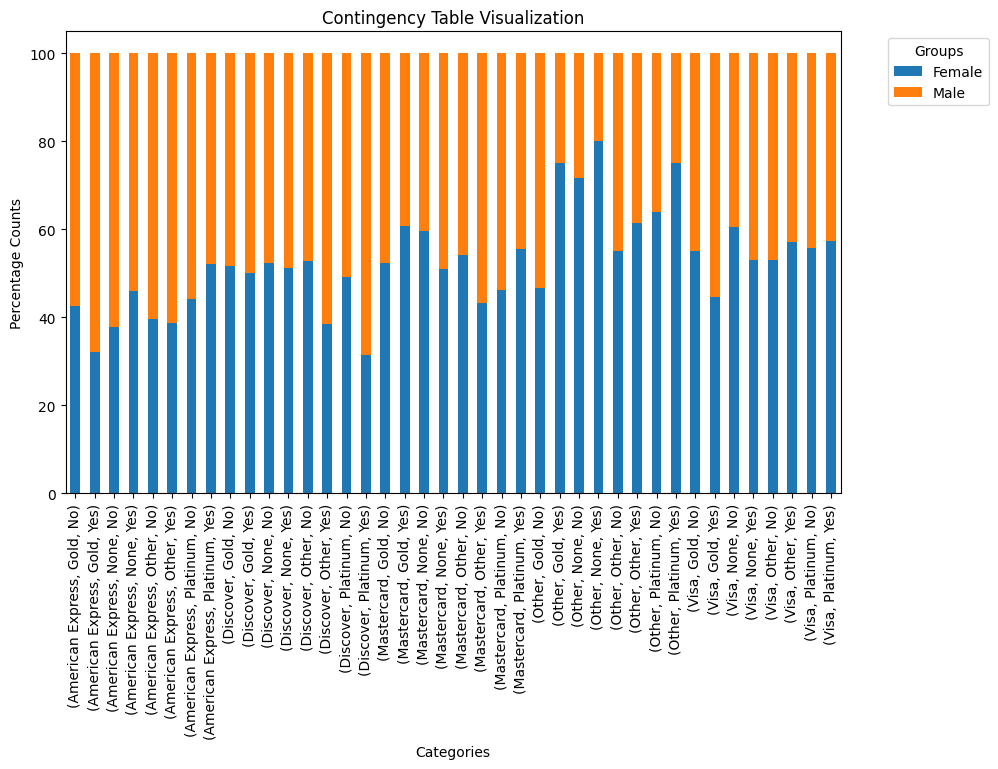

Chi-squared value: 188.5309523079899
p value: 1.7266909679260527e-21
The observed data is unlikely to have occurred by random chance alone:  ['gender', 'card', 'cardtype', 'retire'] are not independent



In [ ]:
contingency_all_dimension(customer_dbase_sel, customer_dbase_sel_key_list)